# Astrometric soluction (SCAMP)

In [1]:
#%matplotlib widget
%matplotlib inline
import os ,glob
import subprocess
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import mpl_toolkits.axes_grid1
import matplotlib.axes as maxes
import astropy.visualization

In [2]:
CLUSTER="ACO1914" # z=
#CLUSTER="ACO2151" # closer z=0.000604
 FILTER="R"

In [3]:
reddir="/data/PhD/LECTURES/astronomical_observations_astro847/data_clusters/%s/red"%(CLUSTER)
scampdir=os.path.join(reddir,'config' ,"scamp")
if CLUSTER=="ACO1914":
    initialwcspath = os.path.join(scampdir, "abell_1914.ahead")
if CLUSTER=="ACO2151":
    initialwcspath = os.path.join(scampdir, "abell_2151.ahead")
configpath = os.path.join(scampdir, "config.txt")

In [4]:
def visualize_image(ax, array, cmap=plt.cm.gray, vmin=None, vmax=None, scale=None, percentile=None, 
                    lower_percentile=None, upper_percentile=None,colorbar=True, show_axis=False,
                   barpos='right'):
    if scale is not None:
        if scale=='zscale':
            vis=astropy.visualization.ZScaleInterval(nsamples=1000, contrast=0.25, max_reject=0.5, 
                                             min_npixels=5, krej=2.5, max_iterations=5)
        elif scale=='minmax': vis=astropy.visualization.MinMaxInterval()
        if percentile is not None: vis=astropy.visualization.PercentileInterval(percentile)
        if (lower_percentile is not None )& (upper_percentile is not None):
                vis=astropy.visualization.AsymmetricPercentileInterval(lower_percentile, upper_percentile )       
        vmin,vmax=vis.get_limits(array)
    print("using vmin, vmax: %.3f, %.3f"%(vmin,vmax))
    if not show_axis: ax.axis('off')
    #ax.axes.xaxis.set_visible(False)
    #ax.axes.yaxis.set_visible(False)
    ec=ax.imshow( array , cmap = cmap , vmin = vmin , vmax =vmax , origin = 'lower')
    if colorbar:
        divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
        if barpos=='right':
            cax = divider.append_axes(barpos, size="5%", pad=0.1, axes_class=maxes.Axes)
            cbar=plt.gcf().colorbar(ec, cax=cax)
        if barpos=='left':
            if ax.get_ylabel() =="": pad=0.1
            else: pad=0.9
            cax = divider.append_axes(barpos, size="5%", pad=pad, axes_class=maxes.Axes)
            cbar=plt.gcf().colorbar(ec, cax=cax)
            cbar.ax.yaxis.set_label_position('left')
            cbar.ax.yaxis.set_ticks_position('left')
        if barpos=='top':
            cax = divider.append_axes(barpos, size="5%", pad=0.1, axes_class=maxes.Axes)
            cbar=plt.gcf().colorbar(ec, cax=cax, orientation='horizontal')
            cbar.ax.xaxis.set_label_position('top')
            cbar.ax.xaxis.set_ticks_position('top')
        if barpos=='bottom':
            if ax.get_xlabel() =="": pad=0.1
            else: pad=0.7
            cax = divider.append_axes(barpos, size="5%", pad=pad, axes_class=maxes.Axes)
            cbar=plt.gcf().colorbar(ec, cax=cax, orientation='horizontal')   
    #ax.grid( color = 'gray') 

In [5]:
def runscamp(catspath, configpath,initialwcspath):
    cmd = ["scamp", catspath,
           "-c", configpath,
           "-AHEADER_GLOBAL", initialwcspath
          ]
    res = subprocess.run(cmd, text=True, capture_output=False)

    if(res.returncode != 0): # only need to see this if error occur:
        print(res.stderr)

In [6]:
cats_string=os.path.join(reddir,"SCIENCE" , FILTER, "*.cat")
catalogfilepaths = sorted(glob.glob(cats_string))
cats_string=' '.join(catalogfilepaths)

In [7]:
%%time
runscamp(cats_string, configpath,initialwcspath)


> WARNING: FGROUP_RADIUS keyword unknown


> WARNING: Obsolete configuration; replacing cocat1.u-strasbg.fr with vizier.u-strasbg.fr

----- SCAMP 2.10.0 started on 2022-06-27 at 11:12:57 with 1 thread

----- 25 inputs:
SCIENCE_R.00000001.Cursor_position.cat:  "no ident           "  EXTERN. HEADER   1 set      43 detections
SCIENCE_R.00000002.Cursor_position.cat:  "no ident           "  EXTERN. HEADER   1 set      43 detections
SCIENCE_R.00000003.Cursor_position.cat:  "no ident           "  EXTERN. HEADER   1 set      52 detections
SCIENCE_R.00000004.Cursor_position.cat:  "no ident           "  EXTERN. HEADER   1 set      59 detections
SCIENCE_R.00000005.Cursor_position.cat:  "no ident           "  EXTERN. HEADER   1 set      56 detections
SCIENCE_R.00000006.Cursor_position.cat:  "no ident           "  EXTERN. HEADER   1 set      59 detections
SCIENCE_R.00000007.Cursor_position.cat:  "no ident           "  EXTERN. HEADER   1 set      53 detections
SCIENCE_R.00000008.Cursor_position.cat

CPU times: user 42.5 ms, sys: 24 ms, total: 66.5 ms
Wall time: 2min 37s


 
----- Astrometric stats (internal) :

                  All detections         |           High S/N           
           dAXIS1  dAXIS2   chi2   ndets | dAXIS1  dAXIS2   chi2   ndets
Group  1: 0.0599" 0.0503"      1    1150 0.0105" 0.0133"    1.8     244
 
----- Astrometric stats (external):

                  All detections         |           High S/N           
           dAXIS1  dAXIS2   chi2  nstars | dAXIS1  dAXIS2   chi2  nstars
Group  1:  0.152"  0.118"     11      46  0.136"  0.108"    8.3      15
 
----- Photometric stats (internal):

                     All detections     |        High S/N        
         Instru mag RMS    chi2   ndets | mag RMS    chi2   ndets
Group  1: P1     0.19 4.9e+02    1135   0.158 2.1e+03     242
 
----- Photometric stats (external):

                     All detections     |        High S/N        
         Instru mag RMS    chi2  nstars | mag RMS    chi2  nstars



# COADDITION (SWARP)

In [8]:
imgspaths = sorted(glob.glob(os.path.join(reddir,"SCIENCE", FILTER,  "*.FIT")))
imgs_string=' '.join(imgspaths)
swarpdir=os.path.join(reddir,'config' ,"swarp")
configpath = os.path.join(swarpdir, "config.txt")

In [9]:
def runswarp(imgspath, configpath, IMAGEOUT_NAME,WEIGHTOUT_NAME,COMBINE_TYPE, GAIN_DEFAULT, CENTER_TYPE,
             CENTER,IMAGE_SIZE ):
    cmd = ["swarp", imgspath,
           "-c", configpath,
           "-IMAGEOUT_NAME", IMAGEOUT_NAME,
            "-WEIGHTOUT_NAME", WEIGHTOUT_NAME,                          
            "-COMBINE_TYPE", COMBINE_TYPE,
            "-GAIN_DEFAULT", GAIN_DEFAULT,
            #"-WEIGHT_TYPE", "BACKGROUND",  # not documented, let's not use this
            #"-RESAMPLE_DIR", "./swarpwork",
            "-CENTER_TYPE", CENTER_TYPE, 
            "-CENTER", CENTER,
            "-IMAGE_SIZE", IMAGE_SIZE, 
          ]
    res = subprocess.run(cmd, text=True, capture_output=False)

    if(res.returncode != 0): # only need to see this if error occur:
        print(res.stderr)

In [24]:
COMBINE_TYPE= "CLIPPED"
#COMBINE_TYPE= "AVERAGE"
IMAGEOUT_NAME=os.path.join(reddir,"%s_%s.fits"%(COMBINE_TYPE, FILTER) )
WEIGHTOUT_NAME=os.path.join(reddir,"%s_%s_weight.fits"%(COMBINE_TYPE, FILTER) )
GAIN_DEFAULT="2.3"

if CLUSTER=="ACO1914":
    CENTER_TYPE= "MANUAL"
    CENTER= "14:26:00.0,+37:49:30.0"
    IMAGE_SIZE="1200,900"

elif CLUSTER=="ACO2151":
    CENTER_TYPE= "MANUAL"
    CENTER= "16:05:05.6,+17:43:20.2"
    #CENTER= "16:05:05.6,+17:41:40.2"
    IMAGE_SIZE="1200,860"

#CENTER_TYPE= "ALL"
#CENTER= "00:00:00.0, +00:00:00.0"
#IMAGE_SIZE="0"

In [25]:
runswarp(imgs_string, configpath, IMAGEOUT_NAME,WEIGHTOUT_NAME,COMBINE_TYPE,GAIN_DEFAULT, CENTER_TYPE,CENTER,IMAGE_SIZE )

> 
----- SWarp 2.41.5 started on 2022-06-27 at 11:24:13 with 8 threads

> Examining input data ...
> Looking for SCIENCE_R.00000001.Cursor_position.FIT ...

> WARNING: /data/PhD/LECTURES/astronomical_observations_astro847/data_clusters/ACO1914/red/SCIENCE/R/SCIENCE_R.00000001.Cursor_position.FIT has flux scale = 0: I will take 1 instead

> Looking for SCIENCE_R.00000002.Cursor_position.FIT ...

> WARNING: /data/PhD/LECTURES/astronomical_observations_astro847/data_clusters/ACO1914/red/SCIENCE/R/SCIENCE_R.00000002.Cursor_position.FIT has flux scale = 0: I will take 1 instead

> Looking for SCIENCE_R.00000003.Cursor_position.FIT ...

> WARNING: /data/PhD/LECTURES/astronomical_observations_astro847/data_clusters/ACO1914/red/SCIENCE/R/SCIENCE_R.00000003.Cursor_position.FIT has flux scale = 0: I will take 1 instead

> Looking for SCIENCE_R.00000004.Cursor_position.FIT ...

> WARNING: /data/PhD/LECTURES/astronomical_observations_astro847/data_clusters/ACO1914/red/SCIENCE/R/SCIENCE_R.00000004.

> Resampling line:    333 / 900    
> Resampling line:    666 / 900    
> 
-------------- File SCIENCE_R.00000003.Cursor_position.FIT:
    "no ident"  unweighted  EXT. HEADER  1536x1024  32 bits (floats)
    Center: 14:26:00.80 +37:48:38.8   21.1'x14.1'  Scale: 0.8244 ''/pixel
    Gain: 2.3 e-/ADU   Flux scaling (astrom/photom): 0.9999 X / 1 X
> Setting up background maps ...
> Setting up background map at line:    128 / 1024   
> Setting up background map at line:    256 / 1024   
> Setting up background map at line:    384 / 1024   
> Setting up background map at line:    512 / 1024   
> Setting up background map at line:    640 / 1024   
> Setting up background map at line:    768 / 1024   
> Setting up background map at line:    896 / 1024   
> Filtering background map(s) ...
> Computing backgound d-map ...
> Computing backgound-noise d-map ...
    Background: 3097.985   RMS: 37.46041

> Reading /data/PhD/LECTURES/astronomical_observations_astro847/data_clusters/ACO1914/red/SCIENCE

> Resampling line:    333 / 900    
> Resampling line:    666 / 900    
> 
-------------- File SCIENCE_R.00000010.Cursor_position.FIT:
    "no ident"  unweighted  EXT. HEADER  1536x1024  32 bits (floats)
    Center: 14:25:59.95 +37:49:03.1   21.1'x14.1'  Scale: 0.8244 ''/pixel
    Gain: 2.3 e-/ADU   Flux scaling (astrom/photom): 1 X / 1 X
> Setting up background maps ...
> Setting up background map at line:    128 / 1024   
> Setting up background map at line:    256 / 1024   
> Setting up background map at line:    384 / 1024   
> Setting up background map at line:    512 / 1024   
> Setting up background map at line:    640 / 1024   
> Setting up background map at line:    768 / 1024   
> Setting up background map at line:    896 / 1024   
> Filtering background map(s) ...
> Computing backgound d-map ...
> Computing backgound-noise d-map ...
    Background: 2475.801   RMS: 33.60463

> Reading /data/PhD/LECTURES/astronomical_observations_astro847/data_clusters/ACO1914/red/SCIENCE/R/SC

> Resampling line:    333 / 855    
> Resampling line:    666 / 855    
> 
-------------- File SCIENCE_R.00000017.Cursor_position.FIT:
    "no ident"  unweighted  EXT. HEADER  1536x1024  32 bits (floats)
    Center: 14:25:57.29 +37:47:26.8   21.1'x14.1'  Scale: 0.8243 ''/pixel
    Gain: 2.3 e-/ADU   Flux scaling (astrom/photom): 1 X / 1 X
> Setting up background maps ...
> Setting up background map at line:    128 / 1024   
> Setting up background map at line:    256 / 1024   
> Setting up background map at line:    384 / 1024   
> Setting up background map at line:    512 / 1024   
> Setting up background map at line:    640 / 1024   
> Setting up background map at line:    768 / 1024   
> Setting up background map at line:    896 / 1024   
> Filtering background map(s) ...
> Computing backgound d-map ...
> Computing backgound-noise d-map ...
    Background: 1960.063   RMS: 30.04205

> Reading /data/PhD/LECTURES/astronomical_observations_astro847/data_clusters/ACO1914/red/SCIENCE/R/SC

    "no ident"  unweighted  EXT. HEADER  1536x1024  32 bits (floats)
    Center: 14:26:01.00 +37:48:09.4   21.1'x14.1'  Scale: 0.8243 ''/pixel
    Gain: 2.3 e-/ADU   Flux scaling (astrom/photom): 1 X / 1 X
> Setting up background maps ...
> Setting up background map at line:    128 / 1024   
> Setting up background map at line:    256 / 1024   
> Setting up background map at line:    384 / 1024   
> Setting up background map at line:    512 / 1024   
> Setting up background map at line:    640 / 1024   
> Setting up background map at line:    768 / 1024   
> Setting up background map at line:    896 / 1024   
> Filtering background map(s) ...
> Computing backgound d-map ...
> Computing backgound-noise d-map ...
    Background: 2387.61   RMS: 33.07518

> Reading /data/PhD/LECTURES/astronomical_observations_astro847/data_clusters/ACO1914/red/SCIENCE/R/SCIENCE_R.00000023.Cursor_position.FIT
> Resampling /data/PhD/LECTURES/astronomical_observations_astro847/data_clusters/ACO1914/red/SCIENC

using vmin, vmax: -21.852, 36.078


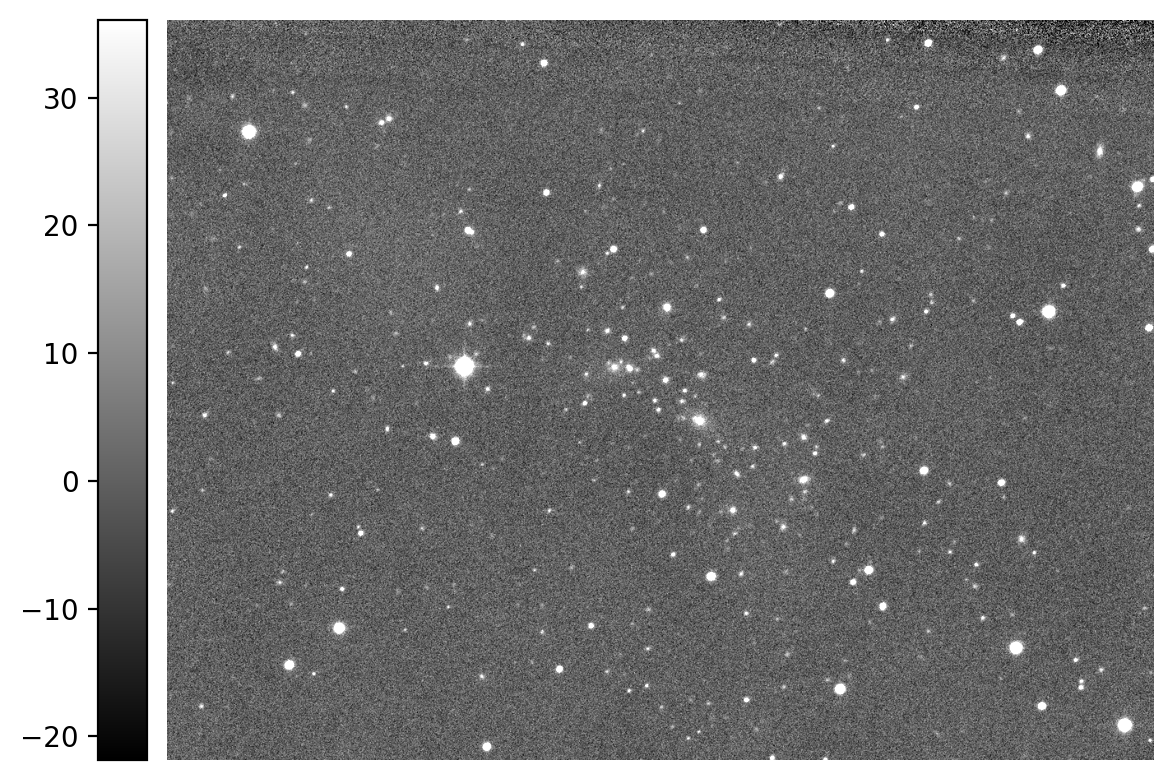

In [26]:
img = fits.getdata(IMAGEOUT_NAME)
fig = plt.figure(dpi=200)
ax = fig.subplots()
visualize_image(ax, img, cmap="gray", scale='zscale', colorbar=True, barpos='left')
fig.tight_layout()

In [27]:
from astropy.wcs import WCS
img = fits.getdata(IMAGEOUT_NAME)
header = fits.getheader(IMAGEOUT_NAME)
wcs = WCS(header)

using vmin, vmax: -21.852, 36.078


<Figure size 432x288 with 0 Axes>

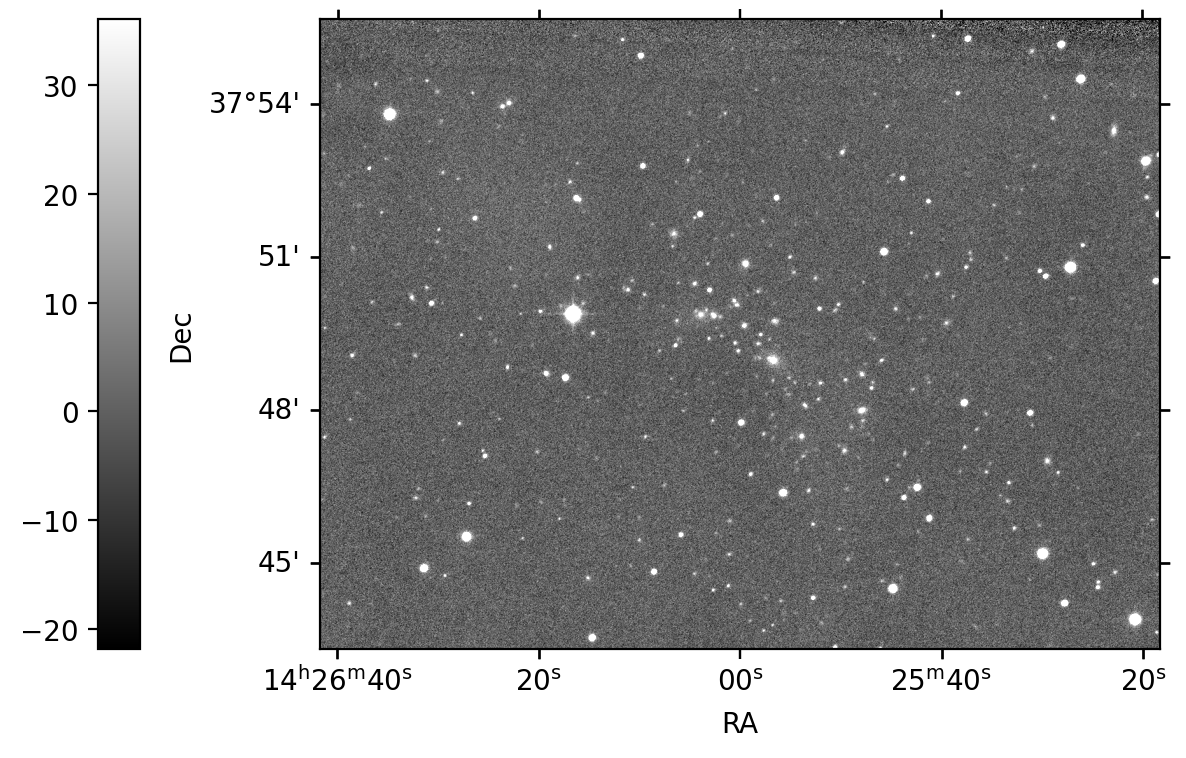

In [28]:
plt.clf()
fig = plt.figure(dpi=200)
ax = fig.subplots(subplot_kw=dict(projection=wcs))
ax.set_xlabel("RA")
ax.set_ylabel("Dec")
#ax.imshow(img, vmin=-30, vmax=100, cmap=plt.cm.gray, origin='lower')
visualize_image(ax, img, scale='zscale', colorbar=True, show_axis=True,barpos='left')
#ax.grid(color='orange')

fig.tight_layout()
fig.savefig("%s.png"%(COMBINE_TYPE))